# CMF assessment 

In [3]:
pip install yfinance pandas matplotlib numpy 

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=6ccc7d20f5cd15ea9fc66144baeba01b6bc31b49ae5edc18305bb675b11d90e2
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
initial_data = yf.download ("JNJ ^VIX", start="2020-11-01", end="2021-11-01")

[*********************100%***********************]  2 of 2 completed


In [5]:
initial_data.head()

Adj Close                  Close                   High  \
                   JNJ       ^VIX         JNJ       ^VIX         JNJ   
Date                                                                   
2020-11-02  134.347153  37.130001  138.690002  37.130001  139.009995   
2020-11-03  134.163101  35.549999  138.500000  35.549999  140.960007   
2020-11-04  135.034927  29.570000  139.399994  29.570000  142.539993   
2020-11-05  135.383636  27.580000  139.759995  27.580000  141.830002   
2020-11-06  137.795670  24.860001  142.250000  24.860001  143.190002   

                              Low                   Open               Volume  \
                 ^VIX         JNJ       ^VIX         JNJ       ^VIX       JNJ   
Date                                                                            
2020-11-02  38.779999  137.490005  36.130001  138.979996  38.570000   7088000   
2020-11-03  36.439999  137.779999  34.189999  140.020004  36.439999   6363000   
2020-11-04  36.849998  138.699997  28.030001  139.490005  36.790001  10263500   
2020-11-05  28.139999  139.259995  26.040001  140.550003  27.559999   8016200   
2020-11-06  29.440001  139.649994  24.559999  140.399994  27.870001   5942500   

                 
           ^VIX  
Date             
2020-11-02    0  
2020-11-03    0  
2020-11-04    0  
2020-11-05    0  
2020-11-06    0

In [6]:
initial_data['Adj Close'].head()

,JNJ,^VIX
Date,,
2020-11-02,134.347153,37.130001
2020-11-03,134.163101,35.549999
2020-11-04,135.034927,29.570000
2020-11-05,135.383636,27.580000
2020-11-06,137.795670,24.860001


In [7]:
data = initial_data['Adj Close']
jnj= data['JNJ']
vix= data['^VIX']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-11-02 to 2021-10-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     251 non-null    float64
 1   ^VIX    251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [8]:
data.head()

,JNJ,^VIX
Date,,
2020-11-02,134.347153,37.130001
2020-11-03,134.163101,35.549999
2020-11-04,135.034927,29.570000
2020-11-05,135.383636,27.580000
2020-11-06,137.795670,24.860001


In [9]:
data.tail()

,JNJ,^VIX
Date,,
2021-10-25,163.012253,15.240000
2021-10-26,164.671387,15.980000
2021-10-27,162.674469,16.980000
2021-10-28,161.790268,16.530001
2021-10-29,161.820068,16.260000


array([<AxesSubplot:xlabel='Date'>], dtype=object)

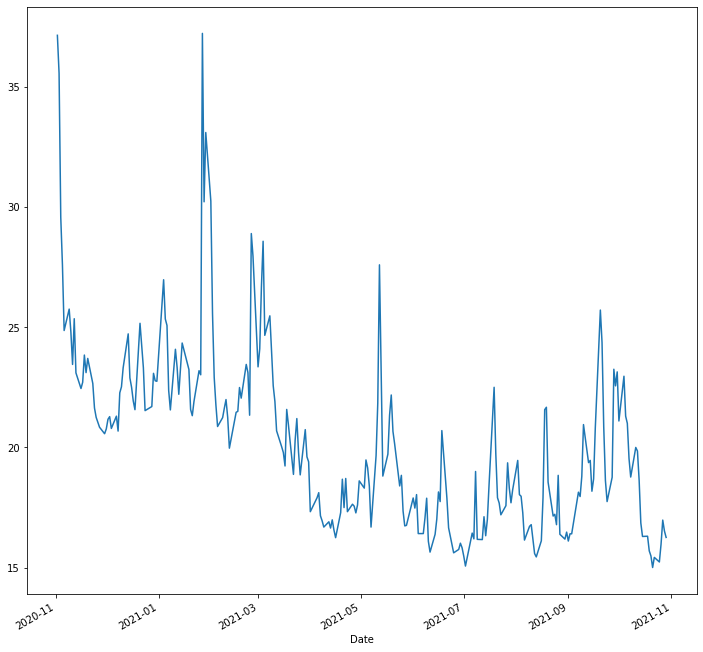

In [10]:
data['^VIX'].plot(figsize=(12,12), subplots=True)

In [11]:
data.describe()

,JNJ,^VIX
count,251.000000,251.000000
mean,160.067325,20.267888
std,8.758315,3.804411
min,134.163101,15.010000
25%,156.600998,17.250000
50%,161.595001,19.660000
75%,165.569275,22.495000
max,177.248840,37.209999


Calculating the annualised volatilty 

In [12]:
log_return = np.log(jnj / jnj.shift(1))

In [13]:
vol = np.sqrt(252)* log_return.std()
print ('the annualised volatility is', round(vol*100,2),'%')

the annualised volatility is 14.72 %


In [14]:
vix= vix[-1]
print('The Market Volatility is', round(vix,2), '%')

The Market Volatility is 16.26 %


In [15]:
#input Table 

In [16]:
jnj[-1]

161.820068359375

In [17]:
S0 = jnj[-1]        # spot stock price 
K = 158             # strike 
T = 1.0             # maturity 
r = 0.01532         # risk free rate 
sig = 0.1626        #diffusion coefficient or volatility 
N = 7               # number of periods or number of time steps 
Payoff = "call"      # payoff


In [18]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 


In [19]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1


In [20]:
S         

array([[161.82006836, 172.07700019, 182.98406553, 194.58247297,
        206.91604309, 220.03137402, 233.97801751, 248.80866614],
       [  0.        , 152.17451778, 161.82006836, 172.07700019,
        182.98406553, 194.58247297, 206.91604309, 220.03137402],
       [  0.        ,   0.        , 143.10390606, 152.17451778,
        161.82006836, 172.07700019, 182.98406553, 194.58247297],
       [  0.        ,   0.        ,   0.        , 134.57396303,
        143.10390606, 152.17451778, 161.82006836, 172.07700019],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        126.55246124, 134.57396303, 143.10390606, 152.17451778],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 119.00909423, 126.55246124, 134.57396303],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 111.91536197, 119.00909423],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.       

In [21]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.5024545674481048

In [22]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if Payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif Payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 90.80866614],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 62.03137402],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 36.58247297],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 14.07700019],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [23]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[13.95326041, 20.1815052 , 28.29721761, 38.31349737, 49.95002781,
        62.72145121, 76.32343368, 90.80866614],
       [ 0.        ,  7.72500728, 12.07458778, 18.30671848, 26.73086825,
        37.27255016, 49.26145926, 62.03137402],
       [ 0.        ,  0.        ,  3.36652823,  5.83413757,  9.88006471,
        16.20288547, 25.32948169, 36.58247297],
       [ 0.        ,  0.        ,  0.        ,  0.88939641,  1.77398138,
         3.53836593,  7.05759008, 14.07700019],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [24]:
print('European ' + Payoff, str( V[0,0]))

European call 13.953260405850628


In [25]:
Payoff = 'put'
print('European ' + Payoff, str( V[0,0]))

European put 13.953260405850628


In [26]:
#monte carlo stimulation 

In [27]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S


In [28]:
T = 1
r = 0.01532 
sigma = 0.1626
S0 = 161.82
K = 158


In [29]:
S = mcs_simulation_np(1000)


In [30]:
S = np.transpose(S)
S


array([[161.82      , 163.26762087, 163.2178329 , ..., 160.37412001,
        161.01838671, 160.74763641],
       [161.82      , 160.70893671, 160.48924515, ..., 217.71120908,
        217.80635124, 218.69023638],
       [161.82      , 160.71057947, 160.8646935 , ..., 128.81120178,
        128.71658283, 127.72769886],
       ...,
       [161.82      , 161.90573117, 161.81746628, ..., 131.1196151 ,
        131.85419669, 132.82017804],
       [161.82      , 161.43430948, 161.61104531, ..., 174.64075944,
        174.34470376, 175.0987349 ],
       [161.82      , 161.6296328 , 161.80687692, ..., 183.10793288,
        185.59561307, 186.09376302]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

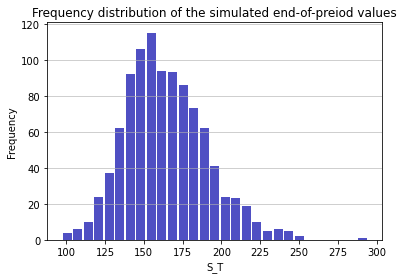

In [31]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')


In [32]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 7.332288244551365


In [33]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))


European call 13.601359366385225


In [34]:
import scipy.stats as si

In [45]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value



In [46]:
euro_option_bsm(161.82, 158, 1, 0.01532, 0.0266, 0.1472, 'call')

10.207905055542469

In [37]:
euro_option_bsm(161.82, 158, 1, 0.01532, 0.0266, 0.1472, 'put')

8.233459789136475

In [38]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 158, 1, 0.01532, 0.0266, 0.1472, 'call')
    Put [i] = euro_option_bsm(S[i], 158, 1, 0.01532, 0.0266, 0.1472, 'put')

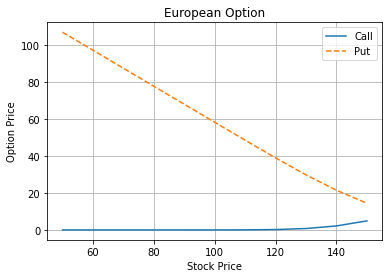

In [39]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

In [73]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T)* si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta = np.exp(-q * T)* si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta


In [74]:
delta(161.82, 158, 1, 0.01532, 0.0266, 0.1472, 'call')

0.5484836704371365

In [75]:
delta(161.82, 158, 1, 0.01532, 0.0266, 0.1472, 'put')

-0.45151632956286347

In [76]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 158, 1, 0.01532, 0.0266, 0.1472, 'call')
    Delta_Put [i] = delta(S[i], 158, 1, 0.01532, 0.0266, 0.1472, 'put')

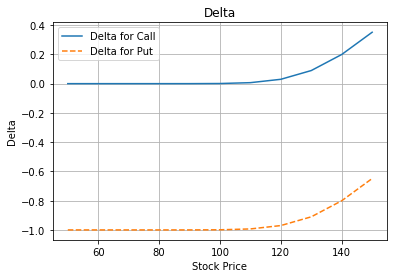

In [77]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [78]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ( vol* S * np.sqrt(T))
    
    return gamma


In [79]:
gamma(161.82, 158, 1, 0.01532, 0.0266, 0.1472, 'call')

0.01610311742948314

In [80]:
gamma(161.82, 158, 1, 0.01532, 0.0266, 0.1472, 'put')

0.01610311742948314

In [81]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 158, 1, 0.01532, 0.0266, 0.1472, 'call')

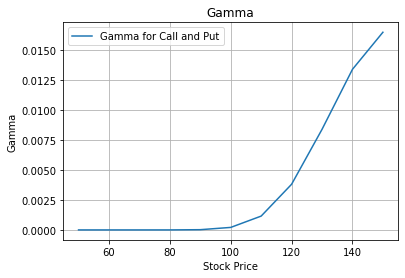

In [82]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])


In [83]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed


In [53]:
speed(161.82, 158, 1, 0.01532, 0.0266, 0.1472, 'call')

-0.0002071799895506455

In [54]:
speed(161.82, 158, 1, 0.01532, 0.0266, 0.1472, 'put')

-0.0002071799895506455

In [55]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 158, 1, 0.01532, 0.0266, 0.1472, 'call')

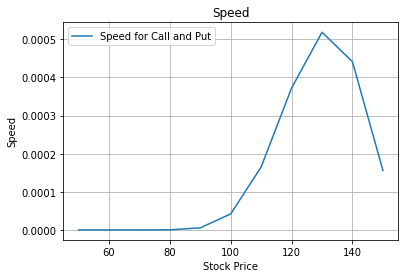

In [56]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

In [87]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = -vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = -vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta


In [88]:
theta(161.82, 158, 1, 0.01532, 0.0266, 0.1472,  'call')

-5.725904983868109

In [89]:
theta(161.82, 158, 1, 0.01532, 0.0266, 0.1472, 'put')


-5.218472226753267

In [90]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(161.82, 158, T[i], 0.01532, 0.0266, 0.1472, 'call')
    Theta_Put [i] = theta(161.82, 158, T[i], 0.01532, 0.0266, 0.1472, 'put')

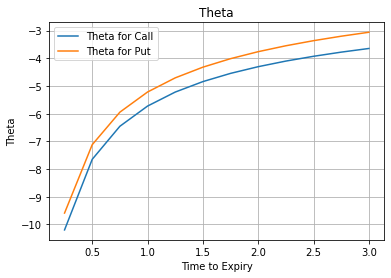

In [91]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [62]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho


In [63]:
rho(161.82, 158, 1, 0.01532, 0.0266, 0.1472, 'call')

78.54772249459498

In [64]:
rho(161.82, 158, 1, 0.01532, 0.0266, 0.1472, 'put')


-77.05016467133414

In [65]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(161.82, 158, 1, r[i], 0.0266, 0.1472, 'call')
    Rho_Put [i] = rho(161.82, 158, 1, r[i], 0.0266, 0.1472, 'put')


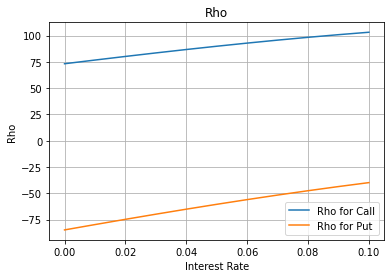

In [66]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])